Impor librari

In [1]:
# Mengimpor pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Memuat dataset

In [2]:
# Load preprocessed dataset
data = pd.read_csv('bankpreprocessed_data.csv')

Memisahkan antara kolom fitur dan target

In [3]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['y'])  # 'y' adalah target
y = data['y']  # Target klasifikasi

Membagi data menjadi data pelatihan dan pengujian dengan rasio 70:30

In [4]:
# Split data menjadi 70% training dan 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Gabungkan kembali data latih dan data uji agar bisa diekspor
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [6]:
# Ekspor data latih ke train.csv
train_data.to_csv('train.csv', index=False)
print("Data latih telah diekspor ke 'train.csv'.")

# Ekspor data uji ke test.csv
test_data.to_csv('test.csv', index=False)
print("Data uji telah diekspor ke 'test.csv'.")

Data latih telah diekspor ke 'train.csv'.
Data uji telah diekspor ke 'test.csv'.


Inisialisasi Model

In [ ]:
# Inisialisasi model klasifikasi
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

Menyimpan hasil evaluasi model

In [ ]:
# Simpan hasil evaluasi
results = {}

# Latih dan evaluasi setiap model
for name, model in models.items():
    # Latih model
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

    # Simpan hasil
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "CV Accuracy Mean": np.mean(cv_scores),
        "CV Accuracy Std": np.std(cv_scores),
        "Confusion Matrix": conf_matrix
    }

Menampilkan hasil evaluasi untuk analisis lebih lanjut

In [ ]:
# Tampilkan hasil evaluasi
print("Hasil Evaluasi Model:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        if metric != "Confusion Matrix":
            print(f"  {metric}: {value}")
        else:
            print(f"  {metric}:")
            print(value)

Hasil Evaluasi Model:

Decision Tree:
  Accuracy: 0.8739309938071366
  Precision: 0.4651307596513076
  Recall: 0.467459324155194
  F1 Score: 0.46629213483146065
  CV Accuracy Mean: 0.8756718930662402
  CV Accuracy Std: 0.004215488304945951
  Confusion Matrix:
[[11107   859]
 [  851   747]]

Random Forest:
  Accuracy: 0.9026098496018874
  Precision: 0.6345966958211856
  Recall: 0.40863579474342926
  F1 Score: 0.4971450323563
  CV Accuracy Mean: 0.9044481326566676
  CV Accuracy Std: 0.0030496164626573337
  Confusion Matrix:
[[11590   376]
 [  945   653]]


Visualisasi hasil

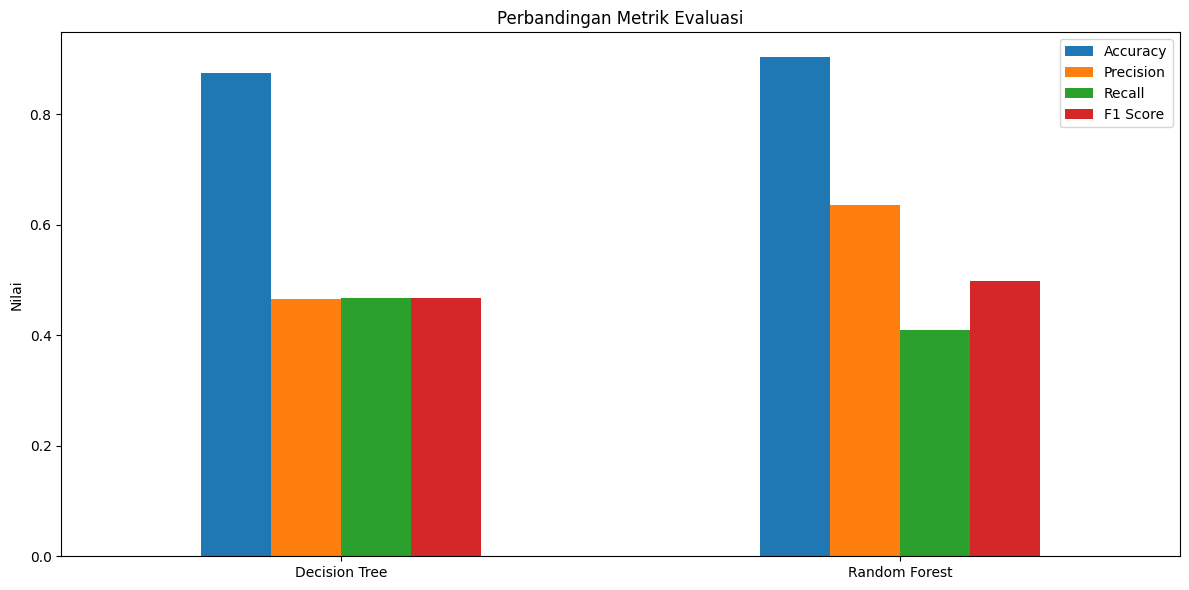

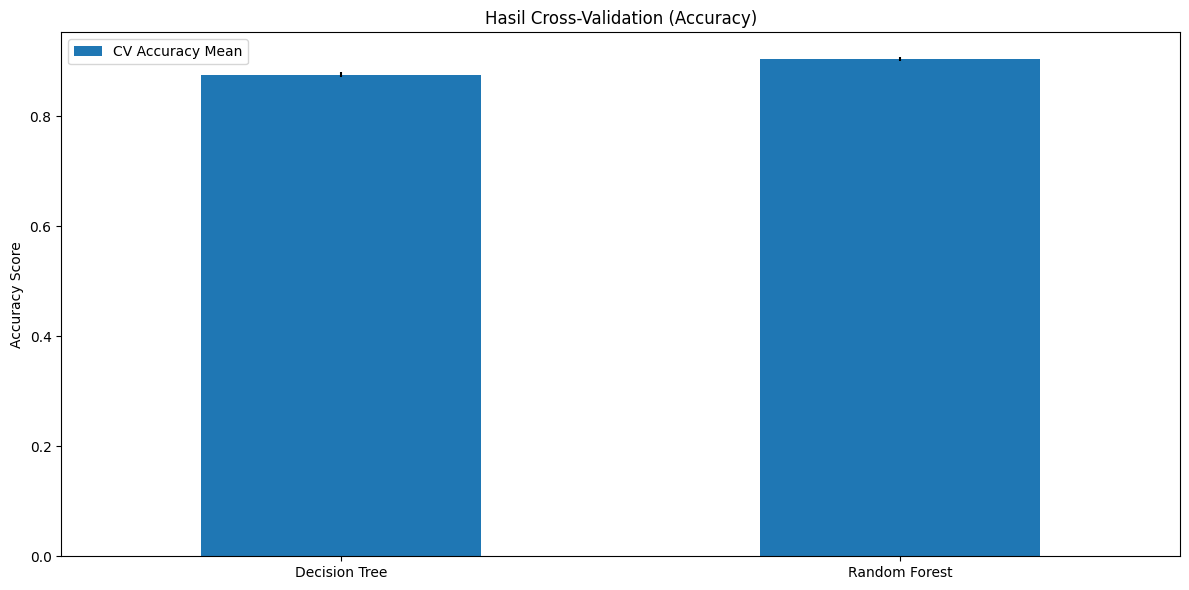

In [ ]:
# Visualisasi hasil perbandingan metrik evaluasi
metrics_df = pd.DataFrame(results).T

# Bar chart untuk setiap metrik
metrics_df[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(kind="bar", figsize=(12, 6), title="Perbandingan Metrik Evaluasi")
plt.ylabel("Nilai")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Visualisasi Cross-Validation Accuracy
metrics_df[["CV Accuracy Mean"]].plot(kind="bar", yerr=metrics_df["CV Accuracy Std"], figsize=(12, 6), title="Hasil Cross-Validation (Accuracy)")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Analisis dan interprestasi hasil

In [ ]:
# Analisis dan Interpretasi
best_model = max(results, key=lambda k: results[k]["Accuracy"])
print(f"\nModel terbaik berdasarkan Akurasi adalah: {best_model}")

# Interpretasi hasil
print("\nInterpretasi Hasil:")
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"- Akurasi: {metrics['Accuracy']:.4f} -> Proporsi prediksi yang benar dari total prediksi.")
    print(f"- Precision: {metrics['Precision']:.4f} -> Proporsi prediksi positif yang benar.")
    print(f"- Recall: {metrics['Recall']:.4f} -> Kemampuan model untuk mendeteksi semua kasus positif.")
    print(f"- F1 Score: {metrics['F1 Score']:.4f} -> Rata-rata harmonis antara precision dan recall.")
    print(f"- Cross-Validation Accuracy Mean: {metrics['CV Accuracy Mean']:.4f} (dengan std {metrics['CV Accuracy Std']:.4f}) -> Performa rata-rata model berdasarkan 5-fold cross-validation.")



Model terbaik berdasarkan Akurasi adalah: Random Forest

Interpretasi Hasil:

Model: Decision Tree
- Akurasi: 0.8739 -> Proporsi prediksi yang benar dari total prediksi.
- Precision: 0.4651 -> Proporsi prediksi positif yang benar.
- Recall: 0.4675 -> Kemampuan model untuk mendeteksi semua kasus positif.
- F1 Score: 0.4663 -> Rata-rata harmonis antara precision dan recall.
- Cross-Validation Accuracy Mean: 0.8757 (dengan std 0.0042) -> Performa rata-rata model berdasarkan 5-fold cross-validation.

Model: Random Forest
- Akurasi: 0.9026 -> Proporsi prediksi yang benar dari total prediksi.
- Precision: 0.6346 -> Proporsi prediksi positif yang benar.
- Recall: 0.4086 -> Kemampuan model untuk mendeteksi semua kasus positif.
- F1 Score: 0.4971 -> Rata-rata harmonis antara precision dan recall.
- Cross-Validation Accuracy Mean: 0.9044 (dengan std 0.0030) -> Performa rata-rata model berdasarkan 5-fold cross-validation.


Contoh prediksi

In [ ]:
# Contoh prediksi dan perbandingan
sample_preds = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": models[best_model].predict(X_test)
}).head(10)

print("\nContoh Prediksi:")
print(sample_preds)


Contoh Prediksi:
   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0
5       0          0
6       0          0
7       0          0
8       0          0
9       0          0
